# Analisando os Dados do Titanic

In [1]:
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold


C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_28076/2897017253.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


### Carregando os Dados

In [2]:
arquivo1 = '../data/train.csv'
arquivo2 = '../data/test.csv'
treino = pd.read_csv(arquivo1, sep=',')
teste = pd.read_csv(arquivo2, sep=',')

In [3]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Set a TrueType font (e.g., Arial) explicitly
plt.rcParams['font.sans-serif'] = 'Arial'

# Create the ProfileReport
profile = ProfileReport(treino, title="titanic_treino")

# Save the report to an HTML file
profile.to_file("../out/reports/titanic_treino.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
treino.shape

(891, 12)

In [6]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
treino.isnull().sum().sort_values(ascending=False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [8]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
teste.shape

(418, 11)

In [10]:
# Set a TrueType font (e.g., Arial) explicitly
plt.rcParams['font.sans-serif'] = 'Arial'

# Create the ProfileReport
profile = ProfileReport(teste, title="titanic_teste")

# Save the report to an HTML file
profile.to_file("../out/reports/titanic_teste.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
teste.isnull().sum().sort_values(ascending=False).head(5)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
dtype: int64

### Colunas com alta cardinalidade como nome, número do ticket e até mesmo o código da cabine não vão ajudar o modelo, pois podem torná-lo menos generalizável. Nesse caso, vamos eliminar essas colunas

In [13]:
# Eliminando para a base de treino
treino = treino.drop(['Name','Ticket','Cabin'],axis=1)

# Também eliminando para a base de teste
teste = teste.drop(['Name','Ticket','Cabin'],axis=1)

### Agora precisamos tratar a coluna Age, que possui valores vazios tanto no treino quanto no teste e isso não faz sentido afinal todos tinham sua idade, esta coluna não deveria ter valores vazios. Logo a baixo iremos verificar oa valores referente a média, mediana e substituir pelo valor mais adequado.

In [14]:
media_treino_idade =treino['Age'].mean()
mediana_treino_idade =treino['Age'].median()

media_teste_idade =teste['Age'].mean()
mediana_teste_idade =teste['Age'].median()


dados_anlise_treino_idade = f'''
    *****************************************
            Dados Análise - Idade
    *****************************************,
    
    * Dados de Treino
    média:          {media_treino_idade}
    mediana:        {mediana_treino_idade}
    
    * Dados de Testes
    média:          {media_teste_idade}
    mediana:        {mediana_teste_idade}
    
'''
print(dados_anlise_treino_idade)


    *****************************************
            Dados Análise - Idade
    *****************************************,
    
    * Dados de Treino
    média:          29.69911764705882
    mediana:        28.0
    
    * Dados de Testes
    média:          30.272590361445783
    mediana:        27.0
    



### A estratégia substituir os Dados nulos pelo valor da Mediana em referência a idade

In [15]:
# Podemos agora selecionar as colunas com idade vazia e substituir pela mediana
treino.loc[treino.Age.isnull(),'Age'] = mediana_treino_idade

# E fazendo o mesmo para a base de teste
teste.loc[teste.Age.isnull(),'Age'] = mediana_teste_idade

### Para a base de treino, ainda temos 2 valores vazios na coluna Embarked. Podemos verificar todos os valores nessa coluna e substituir os valores vazios pela moda

In [16]:
treino.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
treino.Embarked.mode()[0]

'S'

In [18]:
treino.loc[treino.Embarked.isnull(),'Embarked'] = treino.Embarked.mode()[0]

### Podemos utilizar a mesma lógica que fizemos para a coluna Age e realizar o mesmo processo da coluna Fare substituir pela mediana.

In [19]:
media_teste_fare =treino['Fare'].mean()
mediana_teste_fare =treino['Fare'].median()




dados_anlise_teste_fare = f'''
    *****************************************
            Dados Análise - Fare
    *****************************************,
       
    * Dados de Testes
    média:          {media_teste_fare}
    mediana:        {mediana_teste_fare}
    
'''
print(dados_anlise_teste_fare)


    *****************************************
            Dados Análise - Fare
    *****************************************,
       
    * Dados de Testes
    média:          32.2042079685746
    mediana:        14.4542
    



In [20]:
teste.loc[teste.Fare.isnull(),'Fare'] = mediana_teste_fare

### Verificando Novamente

In [21]:
treino.isnull().sum().sort_values(ascending=False).head(5)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [22]:
teste.isnull().sum().sort_values(ascending=False).head(5)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
dtype: int64

In [23]:
# Verificando as colunas de texto na base de treino
col_treino_nr = treino.columns[treino.dtypes != 'object']
col_treino_nr

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [24]:
# Selecionando apenas os valores numéricos da base de treino
treino_nr = treino.loc[:,col_treino_nr]

In [25]:
col_teste_nr = teste.columns[teste.dtypes != 'object']
col_teste_nr

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [26]:
# e os valores numéricos da base de teste
teste_nr = teste.loc[:,col_teste_nr]

In [27]:
caminho = '../data/'
name_arquivo_treino = 'treino_tratados_dados_nulos.csv'
name_arquivo_teste = 'teste_tratados_dados_nulos.csv'


treino.to_csv(caminho+name_arquivo_treino)
teste.to_csv(caminho+name_arquivo_teste)

# Primeiro Modelo

### Podemos selecionar um modelo para classificar esses dados. Para começar, vamos testar entre: 


* Árvore de classificação
 - https://scikit-learn.org/stable/modules/tree.html#classification

* Classificação dos vizinhos mais próximos
 - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

* Regressão Logística

 - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

  - Antes de usar os algoritmos, precisamos separar a base de treino em treino e validação. Vamos fazer isso utilizando o train_test_split.

   - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [28]:
# Separando a base de treino em X e y
X = treino_nr.drop(['PassengerId','Survived'],axis=1)
Y = treino.Survived

In [29]:
# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.33, random_state=42)

# Árvore de classificação

In [30]:
# Criando o classificador
clf_ac = tree.DecisionTreeClassifier(random_state=42)

# Fazendo o fit com os dados
clf_ac = clf_ac.fit(X_train,y_train)

# Fazendo a previsão
y_pred_ac = clf_ac.predict(X_val)


# KNeighborsClassifier

In [31]:
# Criando o classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

# Fazendo o fit com os dados
clf_knn = clf_knn.fit(X_train,y_train)

# Fazendo a previsão
y_pred_knn = clf_knn.predict(X_val)

# Regressão Logística

In [32]:
# Criando o classificador
clf_rl = LogisticRegression(random_state=42)

# Fazendo o fit com os dados
clf_rl = clf_rl.fit(X_train,y_train)

# Fazendo a previsão
y_pred_rl = clf_rl.predict(X_val)

### Avaliação do Modelo

- Acurácia
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- Matriz de Confusão
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


# Acurácia

In [33]:
tree =accuracy_score(y_val, y_pred_ac)
knn =accuracy_score(y_val, y_pred_knn)
rl = accuracy_score(y_val, y_pred_rl)

acuracia = f'''
**********************************************
            Avaliando o Modelo
                Acurácia
**********************************************
Árvore de Decição:         {tree}
Knn:                       {knn}
Regressão Logística:       {rl}
'''
print(acuracia)


**********************************************
            Avaliando o Modelo
                Acurácia
**********************************************
Árvore de Decição:         0.6101694915254238
Knn:                       0.6474576271186441
Regressão Logística:       0.7254237288135593



> [!Note] 
>
> A regressão logística é o melhor modelo dentre os três analisados.

# Matriz de confusão

In [34]:
matriz_confusao_arvore =confusion_matrix(y_val, y_pred_ac)
matriz_confusao_knn = confusion_matrix(y_val, y_pred_knn)
matriz_confusao_rl =confusion_matrix(y_val, y_pred_rl)

matriz_confusao = f'''
**********************************************
              Avaliando o Modelo
             Matriz de Confusçao
**********************************************
Árvore de Decição:         
{matriz_confusao_arvore}
________________________
Knn:                       
{matriz_confusao_knn}
________________________
Regressão Logística:       
{matriz_confusao_rl}
________________________
'''
print(matriz_confusao)


**********************************************
              Avaliando o Modelo
             Matriz de Confusçao
**********************************************
Árvore de Decição:         
[[127  48]
 [ 67  53]]
________________________
Knn:                       
[[136  39]
 [ 65  55]]
________________________
Regressão Logística:       
[[156  19]
 [ 62  58]]
________________________



In [35]:
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare
6,1,54.0,0,0,51.8625
718,3,28.0,0,0,15.5000
685,2,25.0,1,2,41.5792


In [36]:
teste_nr.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875


In [37]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna de id
X_teste = teste_nr.drop("PassengerId",axis=1)
X_teste.head(3)

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875


In [38]:
# Utilizando a regressão logística na base de teste
y_pred = clf_rl.predict(X_teste)

# Criando uma coluna com a previsão na base de teste
teste['Survived'] = y_pred

# Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = teste[['PassengerId','Survived']]

# Exportando para um csv
base_envio.to_csv('../out/result/modelo1.csv',index=False)

# Segundo Modelo: tratamento das informações de texto para verificar se incluindo essas informações nós conseguimos aumentar a acurácia do modelo.

In [39]:
treino = pd.read_csv(caminho+name_arquivo_treino)
treino = treino.drop(['Unnamed: 0'], axis=1)
treino.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


In [40]:
teste = pd.read_csv(caminho+name_arquivo_teste)
teste = teste.drop(['Unnamed: 0'], axis=1)
teste.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q


In [41]:
# Verificando as colunas de texto na base de treino
treino.columns[treino.dtypes == 'object']

Index(['Sex', 'Embarked'], dtype='object')

In [42]:
# Verificando os valores na coluna Sex
treino.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [43]:
# e na coluna Embarked
treino.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

# Para tratar a coluna “Sex”, podemos criar uma coluna chamada “Male_Check” que vai receber 1 se o gênero for masculino e 0 se o gênero for feminino

In [44]:
# Usando uma lambda function para fazer esse tratamento
treino['MaleCheck'] = treino.Sex.apply(lambda x: 1 if x == 'male' else 0)

# Verificando os valores
treino[['Sex','MaleCheck']].value_counts()

Sex     MaleCheck
male    1            577
female  0            314
dtype: int64

# Agora, para tratar a coluna Embarked usando o OneHotEncoder que irá criar uma nova coluna para cada um dos rótulos da coluna original

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [45]:
# Criando o encoder
ohe = OneHotEncoder(handle_unknown='ignore', dtype='int32')

# Fazendo o fit com os dados
ohe.fit(treino[['Embarked']])

# Fazendo a transformação
data_one = ohe.transform(treino[['Embarked']]).toarray()

# Obtendo os nomes das features após a transformação
feature_names = ohe.get_feature_names(['Embarked'])

# Transformando esse resultado em um DataFrame
ohe_df = pd.DataFrame(data_one, columns=feature_names)
ohe_df.head(3)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1


In [46]:
# Podemos agora adicionar essa coluna na nossa base de treino
treino = pd.concat([treino,ohe_df],axis=1)

# Verificando os valores
treino[['Embarked','Embarked_C','Embarked_Q','Embarked_S']].value_counts()

Embarked  Embarked_C  Embarked_Q  Embarked_S
S         0           0           1             646
C         1           0           0             168
Q         0           1           0              77
dtype: int64

In [47]:
# Verificando as colunas de texto na base de teste
teste.columns[teste.dtypes == 'object']

Index(['Sex', 'Embarked'], dtype='object')

In [48]:
# Verificando os valores na coluna Sex
teste.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [49]:
# e na coluna Embarked
teste.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [50]:
# Usando uma lambda function para fazer esse tratamento
teste['MaleCheck'] = teste.Sex.apply(lambda x: 1 if x == 'male' else 0)

# Verificando os valores
teste[['Sex','MaleCheck']].value_counts()

Sex     MaleCheck
male    1            266
female  0            152
dtype: int64

In [51]:
# Criando o encoder
ohe = OneHotEncoder(handle_unknown='ignore', dtype='int32')

# Fazendo o fit com os dados
ohe.fit(teste[['Embarked']])

# Fazendo a transformação
data_one = ohe.transform(teste[['Embarked']]).toarray()

# Obtendo os nomes das features após a transformação
feature_names = ohe.get_feature_names(['Embarked'])

# Transformando esse resultado em um DataFrame
ohe_df = pd.DataFrame(data_one, columns=feature_names)
ohe_df.head(3)

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0


In [52]:
# Podemos agora adicionar essa coluna na nossa base de treino
teste = pd.concat([teste,ohe_df],axis=1)

# Verificando os valores
teste[['Embarked','Embarked_C','Embarked_Q','Embarked_S']].value_counts()

Embarked  Embarked_C  Embarked_Q  Embarked_S
S         0           0           1             270
C         1           0           0             102
Q         0           1           0              46
dtype: int64

### Visualizando os DataFrames

In [53]:
treino.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,0,1


In [54]:
teste.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,34.5,0,0,7.8292,Q,1,0,1,0
1,893,3,female,47.0,1,0,7.0000,S,0,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,1,0,1,0
3,895,3,male,27.0,0,0,8.6625,S,1,0,0,1
4,896,3,female,22.0,1,1,12.2875,S,0,0,0,1


In [55]:
# Podemos então apagar essas duas colunas que já tratamos
treino = treino.drop(['Sex','Embarked'],axis=1)
teste = teste.drop(['Sex','Embarked'],axis=1)

In [56]:
name_arquivo_treino= 'treino_tatados_dados_sex_embarques.csv'
name_arquivo_teste = 'testes_tatados_dados_sex_embarques.csv'

treino.to_csv(caminho+name_arquivo_treino)
teste.to_csv(caminho+name_arquivo_teste)

In [57]:
# Separando a base de treino em X e y
X = treino.drop(['PassengerId','Survived'],axis=1)
y = treino.Survived

# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

> árvore de classificação

In [58]:
# Criando o classificador
clf_ac = DecisionTreeClassifier(random_state=42)

# Fazendo o fit com os dados
clf_ac = clf_ac.fit(X_train,y_train)

# Fazendo a previsão
y_pred_ac = clf_ac.predict(X_val)

> Knn

In [59]:
# Criando o classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

# Fazendo o fit com os dados
clf_knn = clf_knn.fit(X_train,y_train)

# Fazendo a previsão
y_pred_knn = clf_knn.predict(X_val)

> Regressão Logística

In [60]:
# Criando o classificador
clf_rl = LogisticRegression(random_state=42,max_iter=1000)

# Fazendo o fit com os dados
clf_rl = clf_rl.fit(X_train,y_train)

# Fazendo a previsão
y_pred_rl = clf_rl.predict(X_val)

# Acurácia

In [61]:
tree =accuracy_score(y_val, y_pred_ac)
knn =accuracy_score(y_val, y_pred_knn)
rl = accuracy_score(y_val, y_pred_rl)

acuracia = f'''
**********************************************
            Avaliando o Modelo
                Acurácia
**********************************************
Árvore de Decição:         {tree}
Knn:                       {knn}
Regressão Logística:       {rl}
'''
print(acuracia)


**********************************************
            Avaliando o Modelo
                Acurácia
**********************************************
Árvore de Decição:         0.7322033898305085
Knn:                       0.7254237288135593
Regressão Logística:       0.8135593220338984



# Matriz de confusão

In [62]:
matriz_confusao_arvore =confusion_matrix(y_val, y_pred_ac)
matriz_confusao_knn = confusion_matrix(y_val, y_pred_knn)
matriz_confusao_rl =confusion_matrix(y_val, y_pred_rl)

matriz_confusao = f'''
**********************************************
              Avaliando o Modelo
             Matriz de Confusçao
**********************************************
Árvore de Decição:         
{matriz_confusao_arvore}
________________________
Knn:                       
{matriz_confusao_knn}
________________________
Regressão Logística:       
{matriz_confusao_rl}
________________________
'''
print(matriz_confusao)


**********************************************
              Avaliando o Modelo
             Matriz de Confusçao
**********************************************
Árvore de Decição:         
[[133  42]
 [ 37  83]]
________________________
Knn:                       
[[150  25]
 [ 56  64]]
________________________
Regressão Logística:       
[[153  22]
 [ 33  87]]
________________________



> Fazendo a previsão para os dados de teste
>
> Vamos usar o modelo com melhor precisão para fazer o Predict na base de teste

In [63]:
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,1,0,0,1
718,3,28.0,0,0,15.5000,1,0,1,0
685,2,25.0,1,2,41.5792,1,1,0,0


In [64]:
teste.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,1,0


In [65]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna de id
X_teste = teste.drop(['PassengerId'],axis=1)

In [66]:
X_teste.head(3)

,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,0,1
2,2,62.0,0,0,9.6875,1,0,1,0


In [67]:
# Utilizando a regressão logística na base de teste
y_pred = clf_rl.predict(X_teste)

# Criando uma nova coluna com a previsão na base de teste
teste['Survived'] = y_pred

# Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = teste[['PassengerId','Survived']]

# Exportando para um csv
base_envio.to_csv('../out/result/modelo2.csv',index=False)

# Terceiro Modelo: Engenharia de Variáveis/Recursos

In [68]:
treino = pd.read_csv(caminho+name_arquivo_treino)
treino = treino.drop(['Unnamed: 0'], axis=1)
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1


In [69]:
teste = pd.read_csv(caminho+name_arquivo_teste)
teste = teste.drop(['Unnamed: 0'], axis=1)
teste.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,1,0


### Vamos fazer alguns ajustes nos dados para melhorar o resultado do nosso modelo
- [Podemos começar analisando a escala dos dados](#escala)
- [Depois podemos entender as colunas SibSp e Parch](#familia)
- [Selecionando as melhores variáveis do modelo](#f_selection)
    - [Entendendo a relação entre **Pclass e Fare**](#PclassFare)
    - [Entendendo sobre as **colunas de embarque**](#Embarque)
    - [Entendendo agora as **colunas de família**](#Familia)

#### Analisando a escala dos dados
- As colunas **"Age" e "Fare"** estão em uma **escala muito diferente das outras**, podemos começar fazendo um ajuste nessas escalas
    - Vamos usar os **[ajustes de escala do próprio Scikit-Learn](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)**
    - Como essas colunas possuem outliers, podemos começar tentando utilizar o **[RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)**

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
MaleCheck       int64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
dtype: object


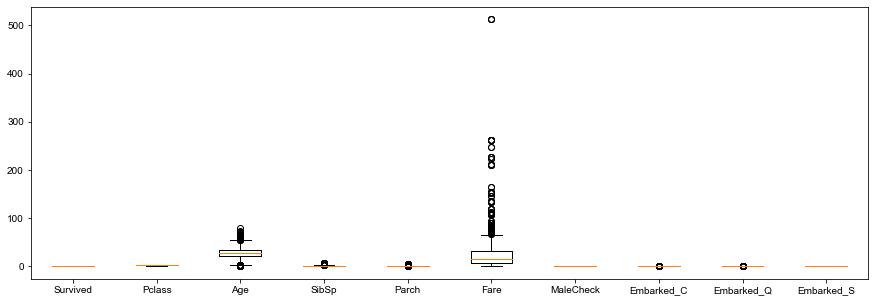

In [70]:
# Verificar os tipos de dados
print(treino.iloc[:, 1:11].dtypes)

# Converter todas as colunas para numérico (assumindo que 'treino' é um DataFrame)
treino.iloc[:, 1:11] = treino.iloc[:, 1:11].apply(pd.to_numeric, errors='coerce')

# Boxplot
fig, ax = plt.subplots(figsize=(15, 5))
ax.boxplot(treino.iloc[:, 1:11])

# Set x-axis ticks and labels
ax.set_xticks(range(1, treino.iloc[:, 1:11].shape[1] + 1))
ax.set_xticklabels(treino.iloc[:, 1:11].columns)

plt.show()

In [71]:
# Criando o scaler
transformer = RobustScaler().fit(treino[['Age','Fare']])

# Fazendo o transformação dos dados
treino[['Age','Fare']] = transformer.transform(treino[['Age','Fare']])

In [72]:
# Fazendo o mesmo para a base de teste
transformer = RobustScaler().fit(teste[['Age','Fare']])
teste[['Age','Fare']] = transformer.transform(teste[['Age','Fare']])

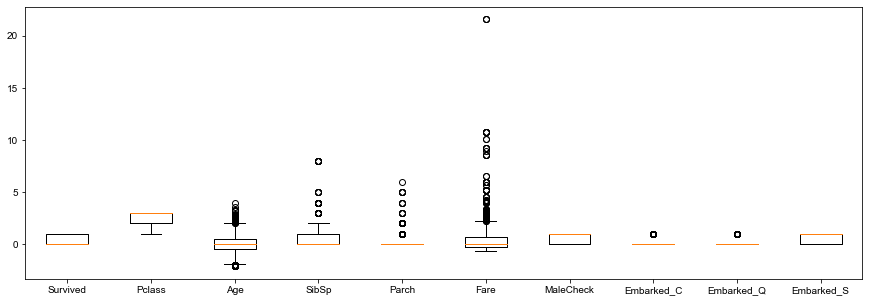

In [73]:
# Visualizando novamente os dados
fig, ax = plt.subplots(figsize=(15, 5))

# Boxplot for the numerical columns (assuming columns 1 to 10 are numerical)
ax.boxplot(treino.iloc[:, 1:11])

# Set x-axis ticks and labels
ax.set_xticks(range(1, treino.iloc[:, 1:11].shape[1] + 1))
ax.set_xticklabels(treino.iloc[:, 1:11].columns)

plt.show()

#### Entendendo as colunas SibSp e Parch
- Agora podemos entender as colunas **SibSp** e **Parch**
    - **SibSp**: Nº de irmãos/cônjuges a bordo do Titanic
    - **Parch**: Nº de pais/filhos a bordo do Titanic
- Podemos verificar quantas pessoas sobreviveram em cada um dos valores dessa coluna

In [74]:
# Verificando a sobrevivência para SibSp
SibSp_df = treino.groupby('SibSp')['Survived'].agg(['sum','count','mean']).reset_index()
SibSp_df.columns = ['SibSp','sobrev','total','tx_sobrev']
SibSp_df

,SibSp,sobrev,total,tx_sobrev
0,0,210,608,0.345395
1,1,112,209,0.535885
2,2,13,28,0.464286
3,3,4,16,0.250000
4,4,3,18,0.166667
5,5,0,5,0.000000
6,8,0,7,0.000000


In [75]:
# Verificando a sobrevivência para Parch
Parch_df = treino.groupby('Parch')['Survived'].agg(['sum','count','mean']).reset_index()
Parch_df.columns = ['Parch','sobrev','total','tx_sobrev']
Parch_df

,Parch,sobrev,total,tx_sobrev
0,0,233,678,0.343658
1,1,65,118,0.550847
2,2,40,80,0.500000
3,3,3,5,0.600000
4,4,0,4,0.000000
5,5,1,5,0.200000
6,6,0,1,0.000000


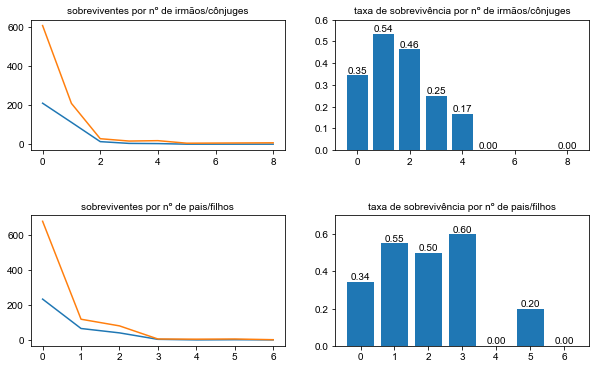

In [76]:
# Visualizando essas informações graficamente
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(10,6))

ax[0,0].plot(SibSp_df.SibSp, SibSp_df.sobrev)
ax[0,0].plot(SibSp_df.SibSp, SibSp_df.total)
ax[0,0].set_title('sobreviventes por nº de irmãos/cônjuges', fontsize=10)

labels1 = ax[0,1].bar(SibSp_df.SibSp, SibSp_df.tx_sobrev)
ax[0,1].bar_label(labels1,fmt="%.02f")
ax[0,1].set(ylim=(0,0.6))
ax[0,1].set_title('taxa de sobrevivência por nº de irmãos/cônjuges', fontsize=10)

ax[1,0].plot(Parch_df.Parch, Parch_df.sobrev)
ax[1,0].plot(Parch_df.Parch, Parch_df.total)
ax[1,0].set_title('sobreviventes por nº de pais/filhos', fontsize=10)

labels2 = ax[1,1].bar(Parch_df.Parch, Parch_df.tx_sobrev)
ax[1,1].bar_label(labels2,fmt="%.02f")
ax[1,1].set(ylim=(0,0.7))
ax[1,1].set_title('taxa de sobrevivência por nº de pais/filhos', fontsize=10)

plt.subplots_adjust(hspace=0.5)

plt.show()

* Passageiros viajando sozinho tiveram um menor percentual de sobrevivência
  * Podemos criar uma nova coluna identificando se o passageiro está viajando sozinho

In [77]:
# Criando uma função para verificar se os dois valores são vazios
def sozinho(a,b):
    if (a == 0 and b == 0):
        return 1
    else:
        return 0

In [78]:
# Aplicando essa função na base de treino
treino['Sozinho'] = treino.apply(lambda x: sozinho(x.SibSp,x.Parch),axis=1)

In [79]:
# Verificando os valores nessa coluna
treino.groupby('Sozinho')[['SibSp','Parch']].mean()

,SibSp,Parch
Sozinho,,
0,1.316384,0.960452
1,0.000000,0.000000


In [80]:
# Fazendo o mesmo para a base de teste
teste['Sozinho'] = teste.apply(lambda x: sozinho(x.SibSp,x.Parch),axis=1)

* Podemos também criar uma nova coluna sendo o total de familiares a bordo

In [81]:
# Criando para a base de treino
treino['Familiares'] = treino.SibSp + treino.Parch

In [82]:
# E para a base de teste
teste['Familiares'] = treino.SibSp + treino.Parch

In [83]:
# Verificando a sobrevivência para Familiares
Familiares_df = treino.groupby('Familiares')['Survived'].agg(['sum','count','mean']).reset_index()
Familiares_df.columns = ['Familiares','sobrev','total','tx_sobrev']
Familiares_df

,Familiares,sobrev,total,tx_sobrev
0,0,163,537,0.303538
1,1,89,161,0.552795
2,2,59,102,0.578431
3,3,21,29,0.724138
4,4,3,15,0.200000
5,5,3,22,0.136364
6,6,4,12,0.333333
7,7,0,6,0.000000
8,10,0,7,0.000000


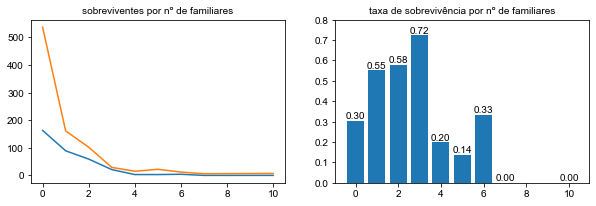

In [84]:
# Visualizando a informação de familiares
fig, ax = plt.subplots(ncols=2,figsize=(10,3))

ax[0].plot(Familiares_df.Familiares, Familiares_df.sobrev)
ax[0].plot(Familiares_df.Familiares, Familiares_df.total)
ax[0].set_title('sobreviventes por nº de familiares', fontsize=10)

labels1 = ax[1].bar(Familiares_df.Familiares, Familiares_df.tx_sobrev)
ax[1].bar_label(labels1,fmt="%.02f")
ax[1].set(ylim=(0,0.8))
ax[1].set_title('taxa de sobrevivência por nº de familiares', fontsize=10)

plt.show()

* Podemos já utilizar essa base no modelo para verificar o resultado

### Selecionando os melhores recursos
* Primeiramente precisamos analisar qual a correlação entre as variáveis e verificar se não existem variáveis que estão basicamente "dizendo a mesma coisa"

In [85]:
# Visualizando a base
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Sozinho,Familiares
0,1,0,3,-0.461538,1,0,-0.312011,1,0,0,1,0,1
1,2,1,1,0.769231,1,0,2.461242,0,1,0,0,0,1
2,3,1,3,-0.153846,0,0,-0.282777,0,0,0,1,1,0


In [86]:
# Analisando a correlação entre as variáveis
treino.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Sozinho,Familiares
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022204,0.057462,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.149683,-0.203367,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.074053,0.135207,0.065997
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,0.030248,-0.031415,-0.006729,0.171647,-0.245619
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.068734,-0.584471,0.890712
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.060814,-0.583398,0.783111
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.162184,-0.271832,0.217138
MaleCheck,0.042939,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.119224,0.303646,-0.200988
Embarked_C,-0.001205,0.168240,-0.243292,0.030248,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.782742,-0.095298,-0.046215
Embarked_Q,-0.033606,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.499421,0.086464,-0.058592


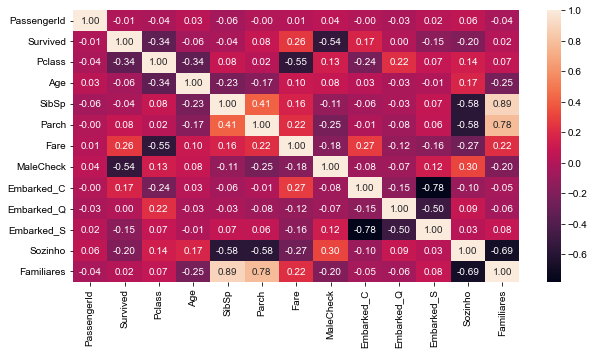

In [87]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(treino.corr(), annot=True, fmt=".2f")
plt.show()

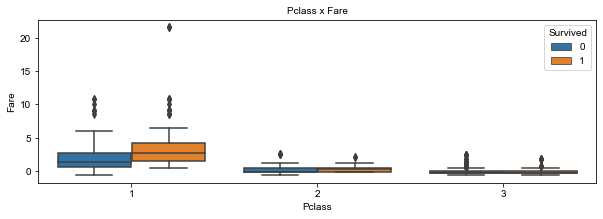

In [88]:
# Visualizando a relação entre essas variáveis
fig, ax = plt.subplots(figsize=(10,3))

sns.boxplot(data=treino,x='Pclass',y='Fare',hue='Survived')
ax.set_title('Pclass x Fare', fontsize=10)

plt.show()

In [89]:
# Verificando a taxa de sobrevivência em cada uma das classes
treino.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [90]:
# Entendendo a relação entre Pclass x Fare
treino.groupby(['Pclass','Survived'])['Fare'].agg(['min','mean','max'])

min      mean        max
Pclass Survived                               
1      0        -0.626005  2.175430  10.764405
       1         0.496977  3.514735  21.562738
2      0        -0.626005  0.214734   2.557247
       1        -0.171255  0.329217   2.189115
3      0        -0.626005 -0.033991   2.386174
       1        -0.626005 -0.032885   1.820802

Nesse momento pode surgir a pergunta do motivo de termos pessoas pagando o mesmo preço em classes diferentes
Procurando no Kaggle, essa resposta ajuda a explicar um pouco:
"Se você conseguiu economizar e guardar todo o seu dinheiro para uma viagem para mudar sua vida e ir para a América, você é uma terceira classe, um imigrante que precisa trazer sua própria comida a bordo e ter em mente como suas provisões se sustentariam. A segunda classe era formada por trabalhadores de colarinho branco que podiam se dar ao luxo de viajar com um pouco de lazer, sem se preocupar com algo tão comum como comida. Primeira classe significa que você nasceu com dinheiro e não precisa sujar as mãos com o trabalho. Eles não eram separados apenas pelo custo, eles também eram separados por onde poderiam ir e o que recebiam."

Também tem um link do Reddit que detalha bem essa questão de classe x preço
https://www.reddit.com/r/AskHistorians/comments/11dlsn6/why_was_the_cost_of_tickets_on_the_titanic_so/?onetap_auto=true
Podemos pensar em direcionar uma análise relacionando ao preço da cabine, porém essa variável possui 77.1% dos valores vazios

Entendendo sobre as colunas de embarque
Inicialmente pensamos não existir relação de ordem entre a coluna de embarque, mas pesquisando nesse artigo percebemos que existe sim essa correlação
"O Titanic deixou o porto de Southampton...Em seguida ele foi para Cherbourg-Octeville na França...em sua maioria da primeira classe.O Titanic então rumou para Queenstown na Irlanda...principalmente imigrantes da terceira classe que pretendiam tentar a vida nos Estados Unidos."

In [91]:
# Podemos importar novamente as bases para "recuperar" a coluna de embarque
treino2 = pd.read_csv('../data/train.csv')
teste2 = pd.read_csv('../data/test.csv')

treino2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [92]:
# Como temos valores vazios, podemos novamente fazer o tratamento dos dados
treino2['Embarked'] = treino2['Embarked'].fillna('S')

* O que podemos fazer agora é colocar o porto em ordem de embarque (S depois C e depois Q)
  * Podemos fazer isso através do OrdinalEncoder

In [93]:
# Criando o encoder
categorias = ['S','C','Q']
enc = OrdinalEncoder(categories=[categorias],dtype='int32')

In [94]:
# Fazendo o fit com os dados
enc = enc.fit(treino2[['Embarked']])
# Podemos então adicionar essa coluna na base de treino original
treino['Embarked'] = enc.transform(treino2[['Embarked']])

In [95]:
# E fazer o fit com os dados de teste
enc = enc.fit(teste2[['Embarked']])
# E adicionar na base de teste original
teste['Embarked'] = enc.transform(teste2[['Embarked']])

In [96]:
# Agora podemos eliminar as colunas desnecessárias
treino = treino.drop(['Embarked_C','Embarked_Q','Embarked_S'],axis=1)
teste = teste.drop(['Embarked_C','Embarked_Q','Embarked_S'],axis=1)

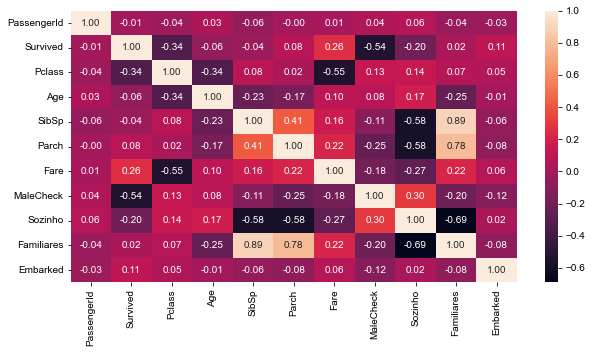

In [97]:
# Visualizando novamente a correlação
fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(treino.corr(), annot=True, fmt=".2f")

plt.show()

* Entendendo agora as colunas de família
  * Podemos usar a regressão logística e a árvore de classificação para verificar a importância de cada uma dessas colunas

In [98]:
treino.head(4)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,1,0,3,-0.461538,1,0,-0.312011,1,0,1,0
1,2,1,1,0.769231,1,0,2.461242,0,0,1,1
2,3,1,3,-0.153846,0,0,-0.282777,0,1,0,0
3,4,1,1,0.538462,1,0,1.673732,0,0,1,0


In [99]:
teste.head(4)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,892,3,0.588235,0,0,-0.281005,1,1,1,2
1,893,3,1.568627,1,0,-0.316176,0,0,1,0
2,894,2,2.745098,0,0,-0.202184,1,1,0,2
3,895,3,0.000000,0,0,-0.245660,1,1,1,0


In [100]:
# Separando X e y
X = treino.drop(['PassengerId','Survived'],axis=1)
y = treino.Survived

In [101]:
X

,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,3,-0.461538,1,0,-0.312011,1,0,1,0
1,1,0.769231,1,0,2.461242,0,0,1,1
2,3,-0.153846,0,0,-0.282777,0,1,0,0
3,1,0.538462,1,0,1.673732,0,0,1,0
4,3,0.538462,0,0,-0.277363,1,1,0,0
...,...,...,...,...,...,...,...,...,...
886,2,-0.076923,0,0,-0.062981,1,1,0,0
887,1,-0.692308,0,0,0.673281,0,1,0,0
888,3,0.000000,1,2,0.389604,0,0,3,0
889,1,-0.153846,0,0,0.673281,1,1,0,1


In [102]:
# Usando a regressão logística nos dados
clf_rl = LogisticRegression(random_state=42,max_iter=1000).fit(X,y)
# Verificando a importância
clf_rl.coef_[0]

array([-1.0326742 , -0.49033135, -0.26896741,  0.01826545,  0.04455768,
       -2.53497767, -0.74102503, -0.25070196,  0.2245328 ])

In [103]:
# Agora usando a árvore de classificação
clf_ac = DecisionTreeClassifier(random_state=42).fit(X,y)

# Verificando a importância
clf_ac.feature_importances_

array([0.11058368, 0.22406348, 0.03971085, 0.02130199, 0.23942842,
       0.31088095, 0.0073744 , 0.02170496, 0.02495127])

In [104]:
name_arquivo_treino = 'treino_tratados_dados_sozinhos_familiares_embarcados.csv'
name_arquivo_teste = 'testes_tratados_dados_sozinhos_familiares_embarcados.csv'


treino.to_csv(caminho +name_arquivo_treino)
teste.to_csv(caminho+name_arquivo_teste)

In [105]:
# Podemos apenas manter as colunas mais relevantes
treino = treino.drop(['SibSp','Parch'],axis=1)
teste = teste.drop(['SibSp','Parch'],axis=1)

# Usando essa nova base no modelo

In [106]:
# Visualizando a base
treino.head(3)

,PassengerId,Survived,Pclass,Age,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,1,0,3,-0.461538,-0.312011,1,0,1,0
1,2,1,1,0.769231,2.461242,0,0,1,1
2,3,1,3,-0.153846,-0.282777,0,1,0,0


In [107]:
teste.head(3)

,PassengerId,Pclass,Age,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,892,3,0.588235,-0.281005,1,1,1,2
1,893,3,1.568627,-0.316176,0,0,1,0
2,894,2,2.745098,-0.202184,1,1,0,2


In [108]:
# Separando X e y
X = treino.drop(['PassengerId','Survived'],axis=1)
y = treino.Survived

In [109]:
# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [110]:
X_train

,Pclass,Age,Fare,MaleCheck,Sozinho,Familiares,Embarked
6,1,2.000000,1.620136,1,1,0,0
718,3,0.000000,0.045293,1,1,0,2
685,2,-0.230769,1.174771,1,0,3,1
73,3,-0.153846,0.000000,1,0,1,1
882,3,-0.461538,-0.170531,0,1,0,0
...,...,...,...,...,...,...,...
106,3,-0.538462,-0.294687,0,1,0,0
270,1,0.000000,0.716591,1,1,0,0
860,3,1.000000,-0.014981,1,0,2,0
435,1,-1.076923,4.571140,0,0,3,0


### Árvore de Classificação

In [111]:
# Criando o classificador
clf_ac = DecisionTreeClassifier(random_state=42)
# Fazendo o fit com os dados
clf_ac = clf_ac.fit(X_train,y_train)
# Fazendo a previsão
y_pred_ac = clf_ac.predict(X_val)

### KNeighborsClassifier

In [112]:
# Criando o classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)
# Fazendo o fit com os dados
clf_knn = clf_knn.fit(X_train,y_train)
# Fazendo a previsão
y_pred_knn = clf_knn.predict(X_val)

### Regressão Logística

In [113]:
# Criando o classificador
clf_rl = LogisticRegression(random_state=42,max_iter=1000)
# Fazendo o fit com os dados
clf_rl = clf_rl.fit(X_train,y_train)
# Fazendo a previsão
y_pred_rl = clf_rl.predict(X_val)

### Acurácia

In [114]:
tree =accuracy_score(y_val, y_pred_ac)
knn =accuracy_score(y_val, y_pred_knn)
rl = accuracy_score(y_val, y_pred_rl)

acuracia = f'''
**********************************************
            Avaliando o Modelo
                Acurácia
**********************************************
Árvore de Decição:         {tree}
Knn:                       {knn}
Regressão Logística:       {rl}
'''
print(acuracia)


**********************************************
            Avaliando o Modelo
                Acurácia
**********************************************
Árvore de Decição:         0.7593220338983051
Knn:                       0.7898305084745763
Regressão Logística:       0.8101694915254237



# Matriz de Confusão

In [115]:
matriz_confusao_arvore =confusion_matrix(y_val, y_pred_ac)
matriz_confusao_knn = confusion_matrix(y_val, y_pred_knn)
matriz_confusao_rl =confusion_matrix(y_val, y_pred_rl)

matriz_confusao = f'''
**********************************************
              Avaliando o Modelo
             Matriz de Confusçao
**********************************************
Árvore de Decição:         
{matriz_confusao_arvore}
________________________
Knn:                       
{matriz_confusao_knn}
________________________
Regressão Logística:       
{matriz_confusao_rl}
________________________
'''
print(matriz_confusao)


**********************************************
              Avaliando o Modelo
             Matriz de Confusçao
**********************************************
Árvore de Decição:         
[[140  35]
 [ 36  84]]
________________________
Knn:                       
[[148  27]
 [ 35  85]]
________________________
Regressão Logística:       
[[154  21]
 [ 35  85]]
________________________



In [116]:
# Visualizando o X_train
X_train.head(3)

,Pclass,Age,Fare,MaleCheck,Sozinho,Familiares,Embarked
6,1,2.000000,1.620136,1,1,0,0
718,3,0.000000,0.045293,1,1,0,2
685,2,-0.230769,1.174771,1,0,3,1


In [117]:
# Visualizando a base de teste
teste.head(3)

,PassengerId,Pclass,Age,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,892,3,0.588235,-0.281005,1,1,1,2
1,893,3,1.568627,-0.316176,0,0,1,0
2,894,2,2.745098,-0.202184,1,1,0,2


In [118]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna de id
X_teste = teste.drop('PassengerId',axis=1)


In [119]:
X_teste.head()

,Pclass,Age,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,3,0.588235,-0.281005,1,1,1,2
1,3,1.568627,-0.316176,0,0,1,0
2,2,2.745098,-0.202184,1,1,0,2
3,3,0.000000,-0.245660,1,1,1,0
4,3,-0.392157,-0.091902,0,0,0,0


In [120]:
# Utilizando a regressão logística na base de teste
y_pred = clf_rl.predict(X_teste)

# Criando uma nova coluna com a previsão na base de teste
teste['Survived'] = y_pred

# Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = teste[['PassengerId','Survived']]

# Exportando para um csv
base_envio.to_csv('../out/result/modelo3.csv',index=False)


# Quarto modelo: Teste Modelos e Melhora de Parâmetro

In [121]:
treino = pd.read_csv(caminho+name_arquivo_treino)
treino = treino.drop(['Unnamed: 0'], axis=1)
teste = pd.read_csv(caminho+name_arquivo_teste)
teste = teste.drop(['Unnamed: 0'], axis=1)

In [122]:
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,1,0,3,-0.461538,1,0,-0.312011,1,0,1,0
1,2,1,1,0.769231,1,0,2.461242,0,0,1,1
2,3,1,3,-0.153846,0,0,-0.282777,0,1,0,0


In [123]:
teste.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,892,3,0.588235,0,0,-0.281005,1,1,1,2
1,893,3,1.568627,1,0,-0.316176,0,0,1,0
2,894,2,2.745098,0,0,-0.202184,1,1,0,2


In [124]:
X = treino.drop(['PassengerId','Survived'],axis=1)
y = treino.Survived

Na base de treino o X será toda a base exceto as colunas PassengerID e Survived. Estamos usando o axis=1 para eliminar a coluna inteira.

In [125]:
# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

Regressão Logística

In [126]:
# Criando o classificador
clf_rl = LogisticRegression(random_state=42)

# Fazendo o fit com os dados
clf_rl = clf_rl.fit(X_train,y_train)

# Fazendo a previsão
y_pred_rl = clf_rl.predict(X_val)


In [127]:
# Avaliando a acurácia
accuracy = accuracy_score(y_val, y_pred_rl)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Outras métricas
print('Relatório de Classificação:\n', classification_report(y_val, y_pred_rl))
print('Matriz de Confusão:\n', confusion_matrix(y_val, y_pred_rl))

Acurácia do modelo: 0.81
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       175
           1       0.79      0.72      0.75       120

    accuracy                           0.81       295
   macro avg       0.80      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295

Matriz de Confusão:
 [[152  23]
 [ 34  86]]


# Random Forest

In [133]:
# Criando o classificador
clf_rf = RandomForestClassifier(random_state=42)

# Fazendo o fit com os dados
clf_rf = clf_rf.fit(X_train,y_train)

# Fazendo previsões no conjunto de validação
y_pred_rf = clf_rf.predict(X_val)

In [134]:
# Avaliando a acurácia
accuracy = accuracy_score(y_val, y_pred_rf)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Outras métricas
print('Relatório de Classificação:\n', classification_report(y_val, y_pred_rf))
print('Matriz de Confusão:\n', confusion_matrix(y_val, y_pred_rf))

Acurácia do modelo: 0.78
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       175
           1       0.73      0.71      0.72       120

    accuracy                           0.78       295
   macro avg       0.77      0.77      0.77       295
weighted avg       0.78      0.78      0.78       295

Matriz de Confusão:
 [[144  31]
 [ 35  85]]


# MLPClassifier (Redes Neurais)

In [135]:
# Criando o classificador
clf_mlp = MLPClassifier(random_state=42,max_iter=5000)

# Fazendo o fit com os dados
clf_mlp = clf_mlp.fit(X_train,y_train)

# Fazendo a previsão
y_pred_mlp = clf_mlp.predict(X_val)

In [136]:
# Avaliando a acurácia
accuracy = accuracy_score(y_val, y_pred_mlp)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Outras métricas
print('Relatório de Classificação:\n', classification_report(y_val, y_pred_mlp))
print('Matriz de Confusão:\n', confusion_matrix(y_val, y_pred_mlp))

Acurácia do modelo: 0.81
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       175
           1       0.81      0.69      0.75       120

    accuracy                           0.81       295
   macro avg       0.81      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295

Matriz de Confusão:
 [[156  19]
 [ 37  83]]


In [137]:
# Visualizando o X_train
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
6,1,2.000000,0,0,1.620136,1,1,0,0
718,3,0.000000,0,0,0.045293,1,1,0,2
685,2,-0.230769,1,2,1.174771,1,0,3,1


In [138]:
# Visualizando a base de teste
teste.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,892,3,0.588235,0,0,-0.281005,1,1,1,2
1,893,3,1.568627,1,0,-0.316176,0,0,1,0
2,894,2,2.745098,0,0,-0.202184,1,1,0,2


In [139]:
# Para a base de teste ser igual à base de treino, precisamos eliminar a coluna de id
X_teste = teste.drop('PassengerId',axis=1)

# Utilizando o melhor modelo na base de teste
y_pred = clf_mlp.predict(X_teste)

# Criando uma coluna com a previsão na base de teste
teste['Survived'] = y_pred

# Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = teste[['PassengerId','Survived']]

# Exportando para um csv
base_envio.to_csv('../out/result/modelo4.csv',index=False)

# Quinto Modelo

In [140]:
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,1,0,3,-0.461538,1,0,-0.312011,1,0,1,0
1,2,1,1,0.769231,1,0,2.461242,0,0,1,1
2,3,1,3,-0.153846,0,0,-0.282777,0,1,0,0


In [141]:
# Separando a base de treino em X e y
X = treino.drop(['PassengerId','Survived'],axis=1)
y = treino.Survived

In [142]:
X

,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,3,-0.461538,1,0,-0.312011,1,0,1,0
1,1,0.769231,1,0,2.461242,0,0,1,1
2,3,-0.153846,0,0,-0.282777,0,1,0,0
3,1,0.538462,1,0,1.673732,0,0,1,0
4,3,0.538462,0,0,-0.277363,1,1,0,0
...,...,...,...,...,...,...,...,...,...
886,2,-0.076923,0,0,-0.062981,1,1,0,0
887,1,-0.692308,0,0,0.673281,0,1,0,0
888,3,0.000000,1,2,0.389604,0,0,3,0
889,1,-0.153846,0,0,0.673281,1,1,0,1


In [143]:
# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão Logística

In [144]:
# Criando o classificador
clf_rl = LogisticRegression(random_state=42)

In [145]:
# Definindo os parâmetros
parametros_rl = {
    'penalty': ['l1','l2'],
    'C': [0.01,0.1,1,10],
    'solver': ['lbfgs','liblinear','saga'],
    'max_iter': [100,1000,5000,10000]
}

# Random Forest

In [146]:
# Criando o classificador
clf_rf = RandomForestClassifier(random_state=42)

In [147]:
# Definindo os parâmetros
parametros_rf = {
    'n_estimators': [100,200,500,1000],
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [2,4,6,8,None],
    'max_features': ['sqrt','log2',None]
}

# MLPClassifier (Redes Neurais)

In [148]:
# Criando o classificador
clf_mlp = MLPClassifier(random_state=42)

In [149]:
# Definindo os parâmetros
parametros_mlp = {
    'solver':  ['lbfgs','sgd','adam'],
    'alpha': [10.0**(-1),10.0**(-5),10.0**(-7),10.0**(-10)],
    'max_iter': [200,500,1000,5000]
}

Fazendo o grid_search

In [150]:
# Ignorando os avisos
import warnings
warnings.filterwarnings('ignore')

In [151]:
def mostra_hora():
    agora = datetime.now()
    print(str(agora.hour)+':'+str(agora.minute)+':'+str(agora.second))

In [152]:
# Para a Regressão Logística
mostra_hora()
kfold_rl = KFold(shuffle=True, random_state=42,n_splits=8)
grid_search_rl = GridSearchCV(estimator=clf_rl,param_grid=parametros_rl,scoring='accuracy',cv=kfold_rl)
grid_search_rl = grid_search_rl.fit(X_train,y_train)
mostra_hora()

22:9:43
22:9:51


In [153]:
# Para o RandomForest
mostra_hora()
kfold_rf = KFold(shuffle=True, random_state=42,n_splits=8)
grid_search_rf = GridSearchCV(estimator=clf_rf,param_grid=parametros_rf,scoring='accuracy',cv=kfold_rf)
grid_search_rf = grid_search_rf.fit(X_train,y_train)
mostra_hora()

22:9:58
22:19:48


In [154]:
# Para o MLPClassifier
mostra_hora()
kfold_mlp = KFold(shuffle=True, random_state=42,n_splits=8)
grid_search_mlp = GridSearchCV(estimator=clf_mlp,param_grid=parametros_mlp,scoring='accuracy',cv=kfold_mlp)
grid_search_mlp = grid_search_mlp.fit(X_train,y_train)
mostra_hora()

22:22:26
22:29:51


In [155]:
analise =f'''  
**********************************************************
            Dados do Treinamento do Modelo
**********************************************************
Regressão Logística
__________________________________________________________
Melhor Score para Regressão Logística: {grid_search_rl.best_score_}
Melhores Parâmetros para Regressão Logística:
{grid_search_rl.best_params_}
----------------------------------------------------------
RandomForest
__________________________________________________________
Melhor Score para RandomForest:        {grid_search_rf.best_score_}
Melhores Parâmetros para RandomForest:
{grid_search_rf.best_params_}
----------------------------------------------------------
MLPClassifier
__________________________________________________________
Melhor Score para MLPClassifier:       {grid_search_mlp.best_score_}
Melhores Parâmetros para MLPClassifier:
{grid_search_mlp.best_params_}
-----------------------------------------------------------
'''
print(analise)

  
**********************************************************
            Dados do Treinamento do Modelo
**********************************************************
Regressão Logística
__________________________________________________________
Melhor Score para Regressão Logística: 0.8089887640449438
Melhores Parâmetros para Regressão Logística:
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
----------------------------------------------------------
RandomForest
__________________________________________________________
Melhor Score para RandomForest:        0.8314606741573034
Melhores Parâmetros para RandomForest:
{'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'n_estimators': 1000}
----------------------------------------------------------
MLPClassifier
__________________________________________________________
Melhor Score para MLPClassifier:       0.8174157303370786
Melhores Parâmetros para MLPClassifier:
{'alpha': 1e-05, 'max_iter': 200, 'solver': 'ad

In [156]:
# Para a regressão logística
clf_rl_best = grid_search_rl.best_estimator_
y_pred_rl = clf_rl_best.predict(X_val)

# Para o RandomForest
clf_rf_best = grid_search_rf.best_estimator_
y_pred_rf = clf_rf_best.predict(X_val)

# e para o MLPClassifier
clf_mlp_best = grid_search_mlp.best_estimator_
y_pred_mlp = clf_mlp_best.predict(X_val)

# Acurácia

In [159]:
# Avaliando a acurácia
accuracy = accuracy_score(y_val, y_pred_rl)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Outras métricas
print('Relatório de Classificação:\n', classification_report(y_val, y_pred_rl))
print('Matriz de Confusão:\n', confusion_matrix(y_val, y_pred_rl))

Acurácia do modelo: 0.80
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Matriz de Confusão:
 [[91 14]
 [21 53]]


In [160]:
# Avaliando a acurácia
accuracy = accuracy_score(y_val, y_pred_rf)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Outras métricas
print('Relatório de Classificação:\n', classification_report(y_val, y_pred_rf))
print('Matriz de Confusão:\n', confusion_matrix(y_val, y_pred_rf))


Acurácia do modelo: 0.80
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179

Matriz de Confusão:
 [[94 11]
 [24 50]]


In [161]:
# Avaliando a acurácia
accuracy = accuracy_score(y_val, y_pred_mlp)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Outras métricas
print('Relatório de Classificação:\n', classification_report(y_val, y_pred_mlp))
print('Matriz de Confusão:\n', confusion_matrix(y_val, y_pred_mlp))

Acurácia do modelo: 0.80
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Matriz de Confusão:
 [[92 13]
 [22 52]]


In [162]:
# Visualizando o X_train
X_train.head(3)


,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
331,1,1.346154,0,0,0.608317,1,1,0,0
733,2,-0.384615,0,0,-0.062981,1,1,0,0
382,3,0.307692,0,0,-0.282777,1,1,0,0


In [169]:
# Visualizando a base de teste
teste.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked,Survived
0,892,3,0.588235,0,0,-0.281005,1,1,1,2,0
1,893,3,1.568627,1,0,-0.316176,0,0,1,0,0
2,894,2,2.745098,0,0,-0.202184,1,1,0,2,0


In [170]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna de id
X_teste = teste.drop(['PassengerId','Survived' ],axis=1)

In [171]:
X_teste.head(3)

,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,3,0.588235,0,0,-0.281005,1,1,1,2
1,3,1.568627,1,0,-0.316176,0,0,1,0
2,2,2.745098,0,0,-0.202184,1,1,0,2


In [166]:
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
331,1,1.346154,0,0,0.608317,1,1,0,0
733,2,-0.384615,0,0,-0.062981,1,1,0,0
382,3,0.307692,0,0,-0.282777,1,1,0,0


In [167]:
X.head(3)

,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,3,-0.461538,1,0,-0.312011,1,0,1,0
1,1,0.769231,1,0,2.461242,0,0,1,1
2,3,-0.153846,0,0,-0.282777,0,1,0,0


In [172]:
# Utilizando a regressão logística na base de teste
y_pred = clf_rl_best.predict(X_teste)

In [175]:
# Criando uma nova coluna com a previsão na base de teste
teste['Survived'] = y_pred

# Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = teste[['PassengerId','Survived']]

# Exportando para um csv
base_envio.to_csv('../out/result/modelo5.csv',index=False)